In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import optimize
import umodel as unf

import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

In [2]:
def plotResult(xEdges, postFitPOIs1, postFitPOIs2):
    
    '''
    This function plot the post-fit unfolded bins 
    versus the unfolded observables values.
    
    xEdges: 1D array with edges of observable values
    postFitPOIs: 2D array of shape (N, 3) with N POI measurment
                 with central value, negative and positive error.
    '''
    
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{+}_{n}$)', 'cos($\\theta^{-}_{n}$)']
    
    for i, (distri1, distri2) in enumerate(zip(postFitPOIs1, postFitPOIs2)):
    
        # y-data
        vals1 = distri1[:, 0]
        errn1 = distri1[:, 1]
        errp1 = distri1[:, 2]
        vals2 = distri2[:, 0]
        errn2 = distri2[:, 1]
        errp2 = distri2[:, 2]

        # Plot figure
        plt.subplot(1, 2, i+1)
        
        # Plot data
        plt.plot(xCenter-0.05, vals1, 'o', markersize=10)
        plt.vlines(x=xCenter-0.05, ymin=vals1-errn1, ymax=vals1+errp1, color='tab:blue', label='w/o corr')
        plt.plot(xCenter+0.05, vals2, 'o', markersize=10, color='tab:red')
        plt.vlines(x=xCenter+0.05, ymin=vals2-errn2, ymax=vals2+errp2, color='tab:red', label='w/ corr')
        
        # Plot cosmetics
        plt.ylabel('Unfolded Yields')
        plt.xlabel(xlabels[i])
        #plt.ylim(0, 200)
        plt.legend()
    

    
def plotErrorBarRatio(xEdges, postFitPOIs1, postFitPOIs2):
    # Plot the result
    plt.figure(figsize=(15, 5))

    # x-data for binned-like plotting
    xUp, xDown = xEdges[1:], xEdges[:-1]
    xCenter = (xUp + xDown) / 2
    
    # Labels
    xlabels = ['cos($\\theta^{+}_{n}$)', 'cos($\\theta^{-}_{n}$)']
    
    for i, (distri1, distri2) in enumerate(zip(postFitPOIs1, postFitPOIs2)):
    
        # y-data
        bar1 =  distri1[:, 2] + distri1[:, 1]
        bar2 =  distri2[:, 2] + distri2[:, 1]

        # Plot figure
        plt.subplot(1, 2, i+1)
        .00001
        # Plot data
        plt.plot(xCenter-0.05, bar2 / bar1, 'o', markersize=10)
        
        # Plot cosmetics
        plt.ylabel('Error Bar Ratio')
        plt.xlabel(xlabels[i])
        plt.ylim(0.0, 2.0)

In [3]:
# Loading data cos(n, +)
with open('../data/CosThetaNplus/asimov_spinCorrelation.json', 'r') as read_file:
    dp = np.array(json.load(read_file))
    
with open('../data/CosThetaNplus/resmat_spinCorrelation.json', 'r') as read_file:
    rp = np.array(json.load(read_file))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


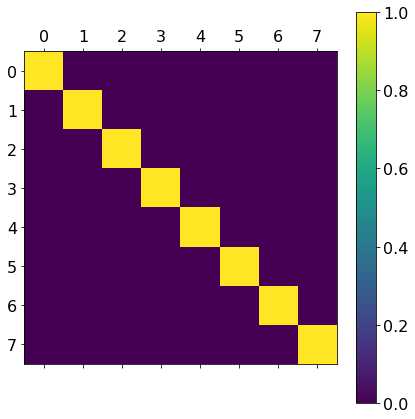

In [10]:
unity = np.diag([1]*8).astype(np.float64)
Ds = [dp, dp]
Rs = [rp, rp]

fullCorr = unity.copy()
for i in range(0, 4):
    for j in range(0, 4):
        if i == j:
            fullCorr[i+4, j] = 0
            fullCorr[i, j+4] = 0

plt.matshow(fullCorr)
print(fullCorr)
plt.colorbar();

mCorr = unf.model(Ds, Rs, fullCorr)
m = unf.model(Ds, Rs, corr=unity)

In [11]:
xc, _ = mCorr.unfold()
xn, _ = m.unfold()

print('Corr - Normal:')
for bc, bn in zip(xc, xn):
    print(bc-bn)
    
print('\nCorr[var1] - Corr[var2]:')
v1, v2 = xc
print(v1-v2)

Corr - Normal:
[0. 0. 0. 0.]
[0. 0. 0. 0.]

Corr[var1] - Corr[var2]:
[0. 0. 0. 0.]


In [12]:
b3Corr = mCorr.postFitUncerPOIs(iPOI=3)
b7Corr = mCorr.postFitUncerPOIs(iPOI=7)

In [13]:
def printMeas(m):
    m = m/1e6
    print('{:.0f}  -{:.2f}  +{:.2f}'.format(m[0], m[1], m[2]))
    
printMeas(b3Corr)
printMeas(b7Corr)

795  -11.58  +11.42
795  -11.58  +11.42


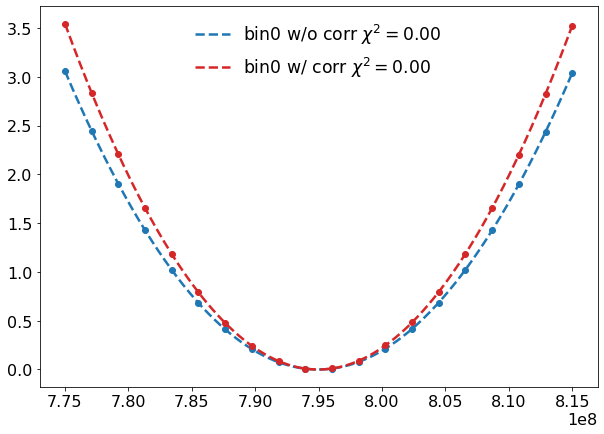

In [18]:
plt.figure()
m.plotProfile(0, 0.775e9, 0.815e9, 20, label='bin0 w/o corr', color='tab:blue')
mCorr.plotProfile(0, 0.775e9, 0.815e9, 20, label='bin0 w/ corr', color='tab:red')

POI=8.16e+08 is not kept (fit didn't converge)


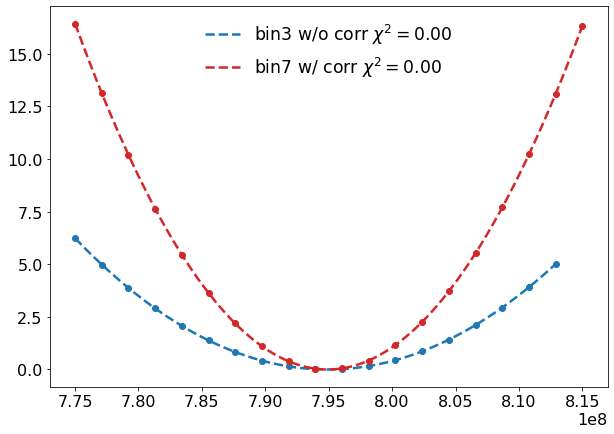

In [6]:
plt.figure()
mCorr.plotProfile(3, 0.775e9, 0.815e9, 20, label='bin3 w/o corr', color='tab:blue')
mCorr.plotProfile(7, 0.775e9, 0.815e9, 20, label='bin7 w/ corr' , color='tab:red')

In [8]:
POIsCorr = mCorr.postFitUncerPOIs()
POIs = m.postFitUncerPOIs()

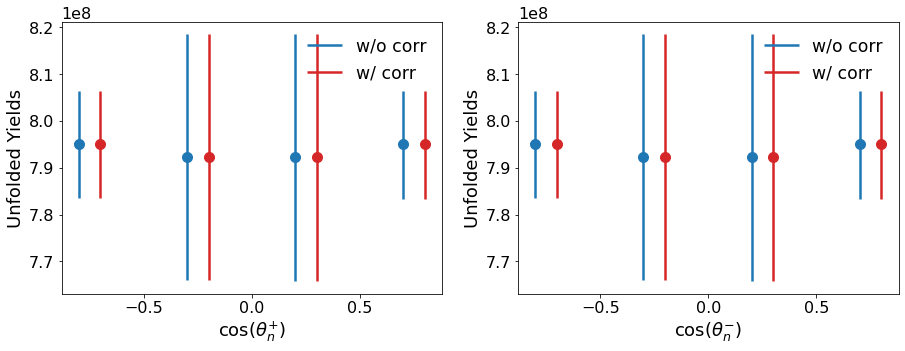

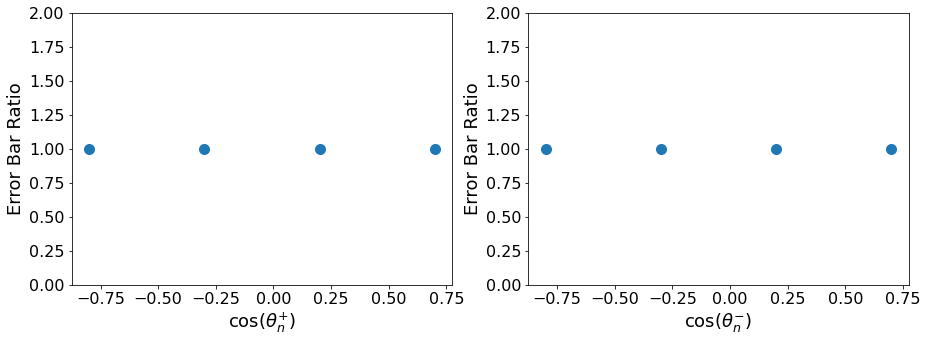

In [9]:
Xs = np.array([-1.0, -0.5, 0, 0.5, 1.0])
plotResult(Xs, POIs, POIsCorr)
plotErrorBarRatio(Xs, POIs, POIsCorr)